In [1]:
# ==================== IMPORTS ====================
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import numpy as np
import matplotlib.pyplot as plt

import warnings as wr
wr.filterwarnings('ignore')

In [2]:
num_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

max_length = 500

x_train_padded = sequence.pad_sequences(x_train, maxlen=max_length)
x_test_padded = sequence.pad_sequences(x_test, maxlen=max_length)

In [3]:
model = Sequential([
    layers.Embedding(
        input_dim=num_words,      # Vocabulary size (10,000 words)
        output_dim=32,             # Embedding dimension
        input_length=max_length    # Fixed input sequence length (500)
    ),
    
    layers.SimpleRNN(
        units=64,                  # Number of RNN units (hidden state dimension)
        return_sequences=False,    # Only return final output (not full sequence)
        activation='relu'          # ReLU activation for non-linearity
    ),
    
    layers.Dense(
        units=1,                   # Single output neuron for binary classification
        activation='sigmoid'       # Sigmoid to output probability (0-1)
    )
])

model.compile(
    optimizer='adam',                    # Adam optimizer (adaptive learning rates)
    loss='binary_crossentropy',          # Binary crossentropy for binary classification
    metrics=['accuracy']                 # Track accuracy metric
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    x_train_padded, 
    y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.2,
    verbose=1
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 17s 92ms/step - accuracy: 0.6166 - loss: 4.1654 - val_accuracy: 0.6392 - val_loss: 0.6346
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 91ms/step - accuracy: 0.7007 - loss: 0.6111 - val_accuracy: 0.6468 - val_loss: 0.6250
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 14s 89ms/step - accuracy: 0.7437 - loss: 0.5697 - val_accuracy: 0.6866 - val_loss: 0.5831
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.7681 - loss: 0.5089 - val_accuracy: 0.6964 - val_loss: 0.5571
Epoch 5/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8159 - loss: 0.4112 - val_accuracy: 0.7900 - val_loss: 0.4306
Epoch 6/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.8607 - loss: 0.3282 - val_accuracy: 0.8336 - val_loss: 0.3830
Epoch 7/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 81ms/step - accuracy: 0.8852 - loss: 0.2887 - val_accuracy: 0.7992 - val_loss: 0.4280
Epoch 8/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 20s 78ms/step - accuracy: 0.9095 - loss: 0.2416 - 

In [5]:
test_loss, test_accuracy = model.evaluate(x_test_padded, y_test, verbose=0)

✓ Training history plot saved as 'rnn_training_history.png'


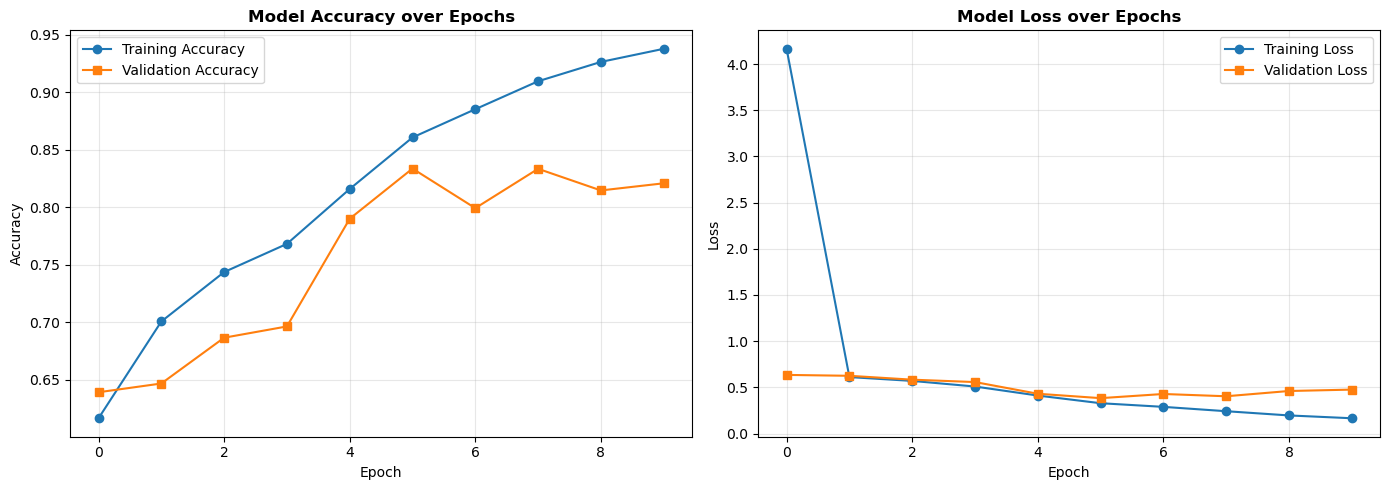

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy plot
axes[0].plot(history.history['accuracy'], label='Training Accuracy', marker='o')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', marker='s')
axes[0].set_title('Model Accuracy over Epochs', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Loss plot
axes[1].plot(history.history['loss'], label='Training Loss', marker='o')
axes[1].plot(history.history['val_loss'], label='Validation Loss', marker='s')
axes[1].set_title('Model Loss over Epochs', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('rnn_training_history.png', dpi=300, bbox_inches='tight')
print("✓ Training history plot saved as 'rnn_training_history.png'")
plt.show()


In [11]:
sample_predictions = model.predict(x_test_padded[:5])
for i in range(5):
    sentiment = "POSITIVE" if sample_predictions[i][0] > 0.5 else "NEGATIVE"
    confidence = sample_predictions[i][0] if sample_predictions[i][0] > 0.5 else 1 - sample_predictions[i][0]
    actual = "POSITIVE" if y_test[i] == 1 else "NEGATIVE"
    match = "✓" if (sample_predictions[i][0] > 0.5) == (y_test[i] == 1) else "✗"
    print(f"  Sample {i+1}: Predicted={sentiment} ({confidence:.4f}), Actual={actual} {match}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
  Sample 1: Predicted=NEGATIVE (0.6360), Actual=NEGATIVE ✓
  Sample 2: Predicted=POSITIVE (0.9843), Actual=POSITIVE ✓
  Sample 3: Predicted=POSITIVE (0.9844), Actual=POSITIVE ✓
  Sample 4: Predicted=POSITIVE (0.8074), Actual=NEGATIVE ✗
  Sample 5: Predicted=POSITIVE (1.0000), Actual=POSITIVE ✓
